<a href="https://colab.research.google.com/github/Neermita18/SystemsBiology/blob/main/Mice_protein_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset processing

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mice_protein_expression = fetch_ucirepo(id=342)

# data (as pandas dataframes)
X = mice_protein_expression.data.features
y = mice_protein_expression.data.targets

# metadata
print(mice_protein_expression.metadata)



{'uci_id': 342, 'name': 'Mice Protein Expression', 'repository_url': 'https://archive.ics.uci.edu/dataset/342/mice+protein+expression', 'data_url': 'https://archive.ics.uci.edu/static/public/342/data.csv', 'abstract': 'Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.', 'area': 'Biology', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 1080, 'num_features': 80, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': ['MouseID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Tue Apr 16 2024', 'dataset_doi': '10.24432/C50S3Z', 'creators': ['Clara Higuera', 'Katheleen Gardiner', 'Krzysztof Cios'], 'intro_paper': {'ID': 475, 'type': 'NATIVE', 'title': 'Self-Organizing Feature Maps Identify Proteins Critical

In [ ]:
mice_protein_expression

{'data': {'ids':        MouseID
  0        309_1
  1        309_2
  2        309_3
  3        309_4
  4        309_5
  ...        ...
  1075  J3295_11
  1076  J3295_12
  1077  J3295_13
  1078  J3295_14
  1079  J3295_15
  
  [1080 rows x 1 columns],
  'features':       DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
  0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
  1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
  2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
  3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
  4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
  ...        ...       ...       ...       ...       ...       ...       ...   
  1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
  1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
  1077  0.228700  0

In [5]:
mice_protein_expression['data']

{'ids':        MouseID
 0        309_1
 1        309_2
 2        309_3
 3        309_4
 4        309_5
 ...        ...
 1075  J3295_11
 1076  J3295_12
 1077  J3295_13
 1078  J3295_14
 1079  J3295_15
 
 [1080 rows x 1 columns],
 'features':       DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
 0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
 1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
 2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
 3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
 4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
 ...        ...       ...       ...       ...       ...       ...       ...   
 1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
 1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
 1077  0.228700  0.395179  0.234118  1.733184  2.2

In [6]:
mice_protein_expression['data']['features']

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C


In [7]:
mice_protein_expression['data']['targets']

,class
0,c-CS-m
1,c-CS-m
2,c-CS-m
3,c-CS-m
4,c-CS-m
...,...
1075,t-SC-s
1076,t-SC-s
1077,t-SC-s
1078,t-SC-s


In [8]:
mice_protein_expression['data']['original']

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Goals: find proteins that contribute the most to various classes and build model to predict those classes

### Data pre-processing

In [47]:
df=mice_protein_expression['data']['original']

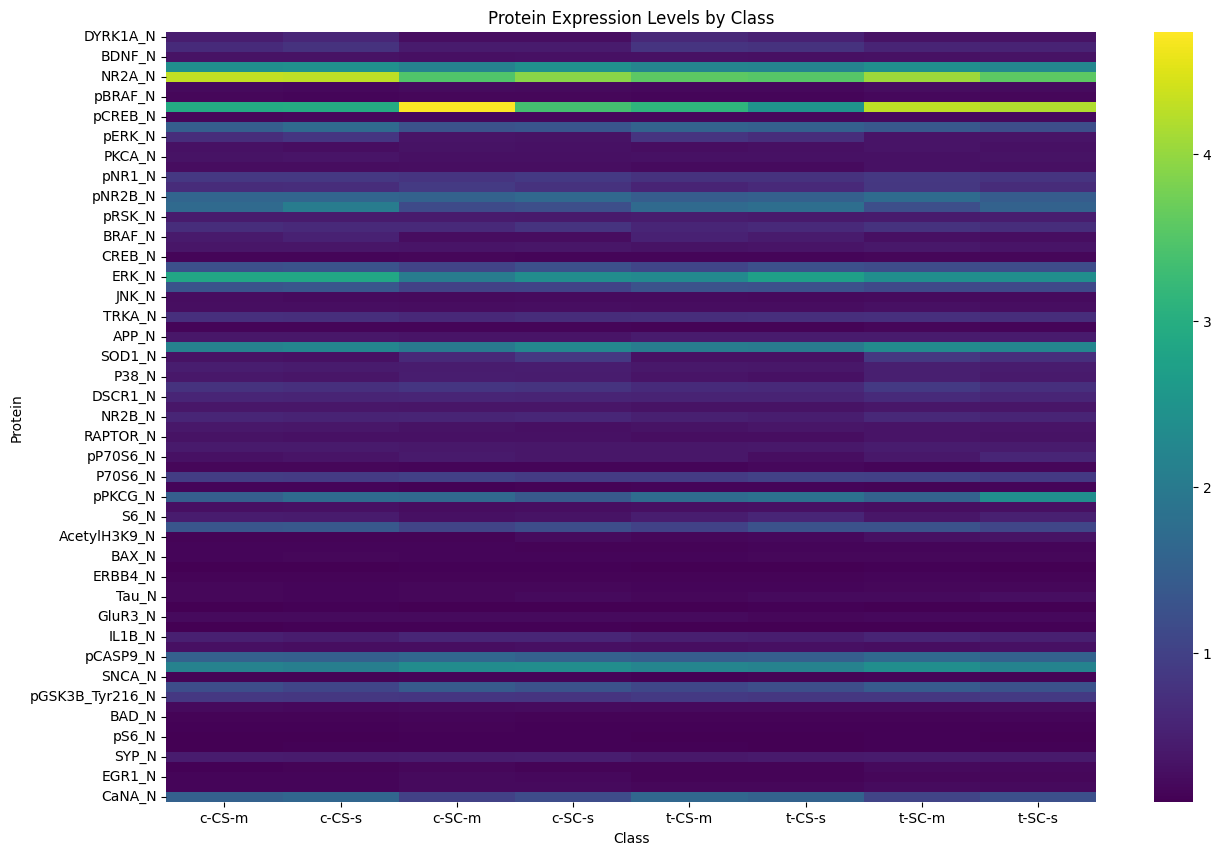

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
df_plot= df.drop(columns=["MouseID", "Genotype", "Behavior", "Treatment"])

class_means = df_plot.groupby('class').mean()

plt.figure(figsize=(15, 10))
sns.heatmap(class_means.T, cmap="viridis", annot=False)
plt.title("Protein Expression Levels by Class")
plt.xlabel("Class")
plt.ylabel("Protein")
plt.show()

In [49]:
df_plot1= df_plot.drop(columns=["class"])

In [51]:
df_plot1

array([[0.64978128, 0.82869641, 0.40586177, ..., 0.14686485, 0.14351664,
        1.62718141],
       [0.61648069, 0.84197425, 0.38858369, ..., 0.16113155, 0.1457194 ,
        1.56209605],
       [0.63742433, 0.85288183, 0.40056145, ..., 0.16059352, 0.14287877,
        1.57186838],
       ...,
       [0.34369516, 0.562547  , 0.36124342, ..., 0.18258957, 0.24371465,
        1.10449403],
       [0.34659373, 0.55146693, 0.39035306, ..., 0.19968529, 0.26986625,
        1.13658537],
       [0.36590689, 0.5528613 , 0.38627546, ..., 0.22005615, 0.24251404,
        1.08562071]])

In [50]:
df_plot1 = df_plot1.replace([np.inf, -np.inf], np.nan)

# Drop rows with any NaN values
df_plot1 = df_plot1.dropna()

# Convert to numpy array and then to float if necessary
df_plot1 = np.array(df_plot1).astype(float)

In [56]:
df_plot.index

RangeIndex(start=0, stop=1080, step=1)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


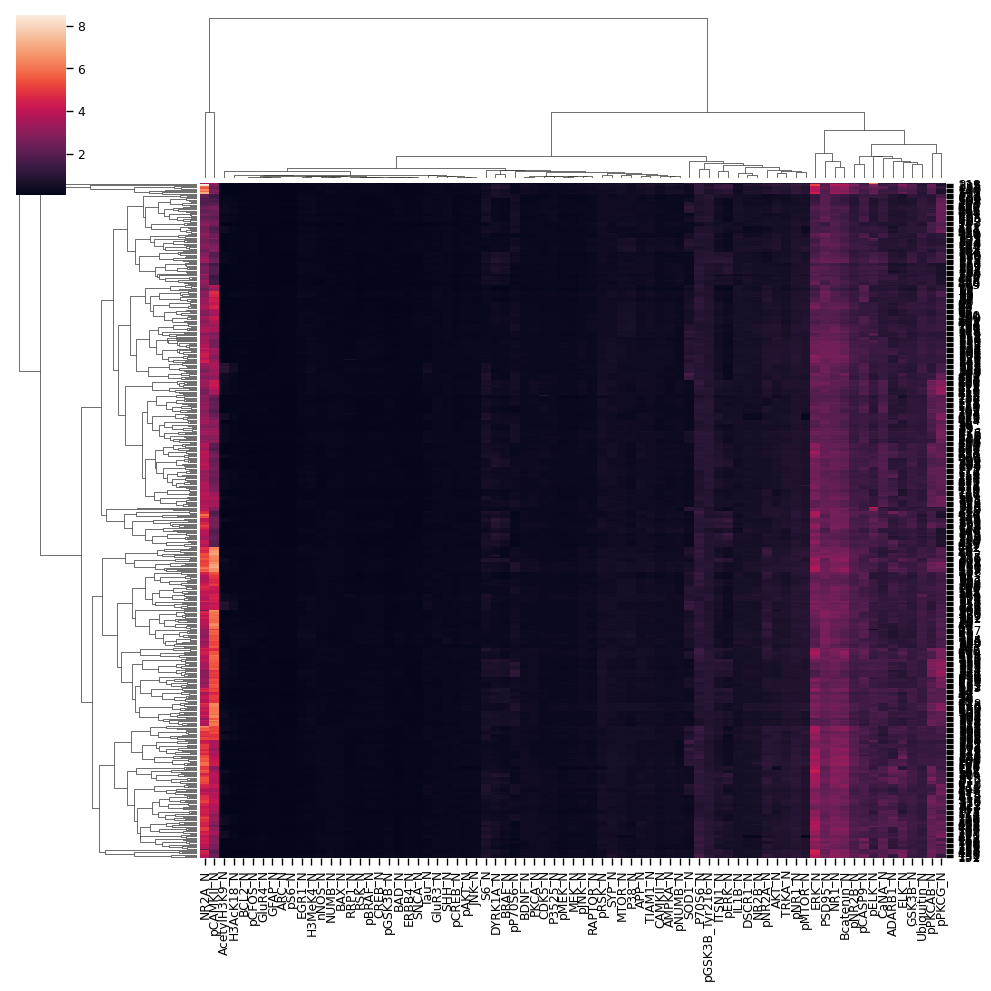

<Figure size 3000x3000 with 0 Axes>

In [65]:
sns.set_context('paper')
sns_plot= sns.clustermap(df_plot1, xticklabels=df_plot.columns, yticklabels=df_plot.index)

plt.figure(figsize=(30,30))
plt.show()